# IT Academy - Data Science with Python
## S13 T01: Supervised Classification (In process, not finished yet)
### [Github Supervised Classification](https://github.com/jesussantana/Supervised-Classification)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Supervised-Classification.svg)](https://wakatime.com/badge/github/jesussantana/Supervised-Classification)

In [1]:
#%pip install lazypredict

In [2]:
# Data treatment
# ==============================================================================
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
from datetime import datetime
from tabulate import tabulate
import missingno as msno

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from IPython.display import Image

# Auto-training of classification and regression models
# ==============================================================================
import pyforest

### importing lazypredict library
import lazypredict

from lazypredict.Supervised import LazyRegressor, LazyClassifier

from scipy.stats import loguniform

# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats import randint
from scipy.stats.mstats import gmean,hmean

from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFECV, SelectKBest, f_regression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, euclidean_distances

from sklearn.inspection import permutation_importance

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Various
# ==============================================================================
import time
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

/home/jesus/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [3]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

### Exercise 1: 
  - Create at least three different classification models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

### Exercise 2: 
  - Creates a new variable depending on whether the flight arrived late or not (ArrDelay> 0).

### Exercise 3: 
  - Compare classification models using accuracy, a confidence matrix, and other more advanced metrics.

### Exercise 4: 
  - Train them using the different parameters they support.  

### Exercise 5: 
  - Compare your performance using the traint / test approach or using all data (internal validation).

### Exercise 5: 
  - Perform some variable engineering process to improve prediction.

### Exercise 6: 
  - Do not use the DepDelay variable when making predictions.

In [4]:
df = df_raw.copy()

## Exploratory analysis

In [5]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754.00,735,1002.00,1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,1829.00,1755,1959.00,1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,1940.00,1915,2121.00,2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,nan,nan,nan,nan,nan


In [6]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [8]:
df.shape

(1936758, 29)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.isna().sum().sort_values()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
Distance                  0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
Dest                      0
Diverted                  0
Origin                    0
CancellationCode          0
Cancelled                 0
DepDelay                  0
TailNum                   5
CRSElapsedTime          198
TaxiOut                 455
TaxiIn                 7110
ArrTime                7110
ArrDelay               8387
AirTime                8387
ActualElapsedTime      8387
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

- Drop features that we do not use

In [11]:
df.drop(axis=1,columns=['Year','Cancelled','CancellationCode','TailNum','FlightNum'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Origin             object 
 14  Dest               object 
 15  Distance           int64  
 16  TaxiIn             float64
 17  TaxiOut            float64
 18  Diverted           int64  
 19  CarrierDelay       float64
 20  WeatherDelay       float64
 21  NASDelay           float64
 22  SecurityDelay      float64
 23  LateAircraftDelay  float64
dtypes: float64(14), int64(7), object(3)
memory usage: 

In [13]:
df.shape

(1936758, 24)

In [14]:
df.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

- Data sampling to reduce loading time

In [15]:
df = df.sample(frac=0.001, random_state = 6858)

## Distribution of the response variable

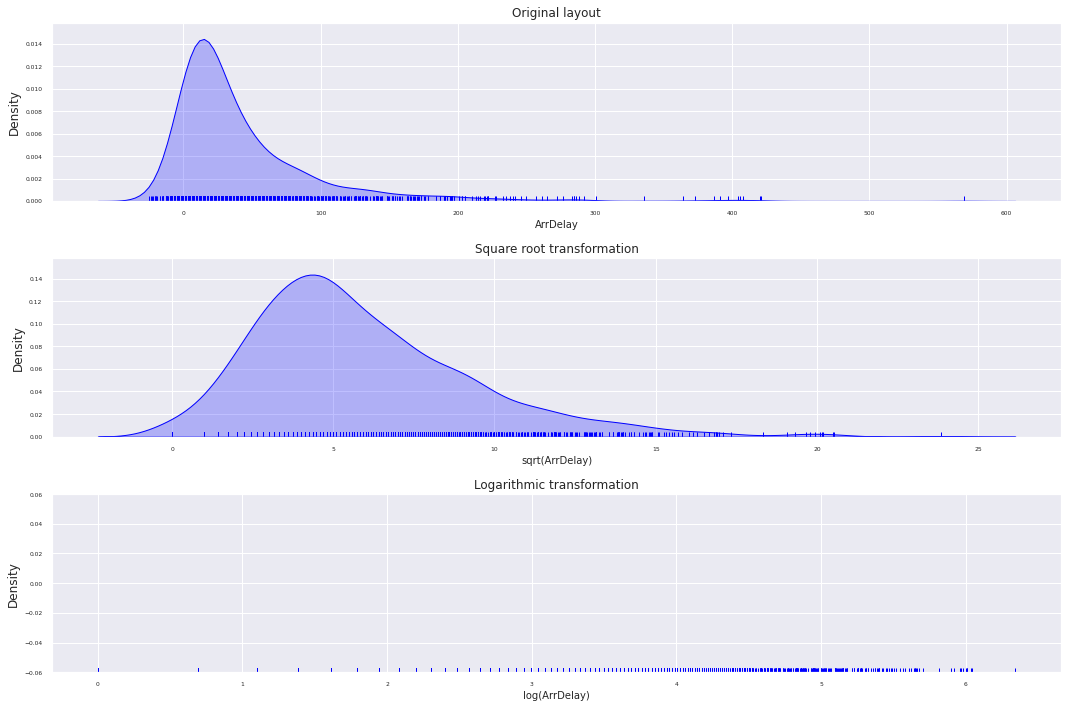

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.ArrDelay,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrDelay', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrDelay)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrDelay)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Response_Variable.png")

## Numerical variables

In [17]:
df.select_dtypes(include=['float64', 'int']).describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1937.00,1937.00,1937.00,1937.00,1937.00,1931.00,1937.00,1931.00,1937.00,1931.00,1931.00,1937.00,1937.00,1931.00,1936.00,1937.00,1269.00,1269.00,1269.00,1269.00,1269.00
mean,6.19,15.64,3.98,1525.73,1472.33,1619.84,1642.60,130.87,132.05,106.20,42.47,43.70,749.70,6.69,18.02,0.00,18.38,4.01,15.34,0.04,24.80
std,3.53,8.63,1.95,446.76,421.89,549.55,463.58,70.31,69.97,67.08,56.64,53.68,569.05,4.47,13.47,0.05,42.63,20.65,36.48,0.92,42.24
min,1.00,1.00,1.00,6.00,10.00,2.00,1.00,32.00,30.00,14.00,-25.00,6.00,45.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1216.00,1145.00,1334.00,1345.00,78.00,80.00,56.00,9.00,12.00,334.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1550.00,1511.00,1730.00,1715.00,113.00,115.00,88.00,24.00,24.00,594.00,6.00,14.00,0.00,1.00,0.00,2.00,0.00,6.00
75%,9.00,23.00,5.00,1854.00,1820.00,2029.50,2010.00,161.00,161.00,134.00,55.00,53.00,984.00,8.00,21.00,0.00,19.00,0.00,14.00,0.00,33.00
max,12.00,31.00,7.00,2356.00,2359.00,2359.00,2359.00,441.00,419.00,370.00,569.00,571.00,3329.00,44.00,137.00,1.00,569.00,285.00,421.00,25.00,387.00


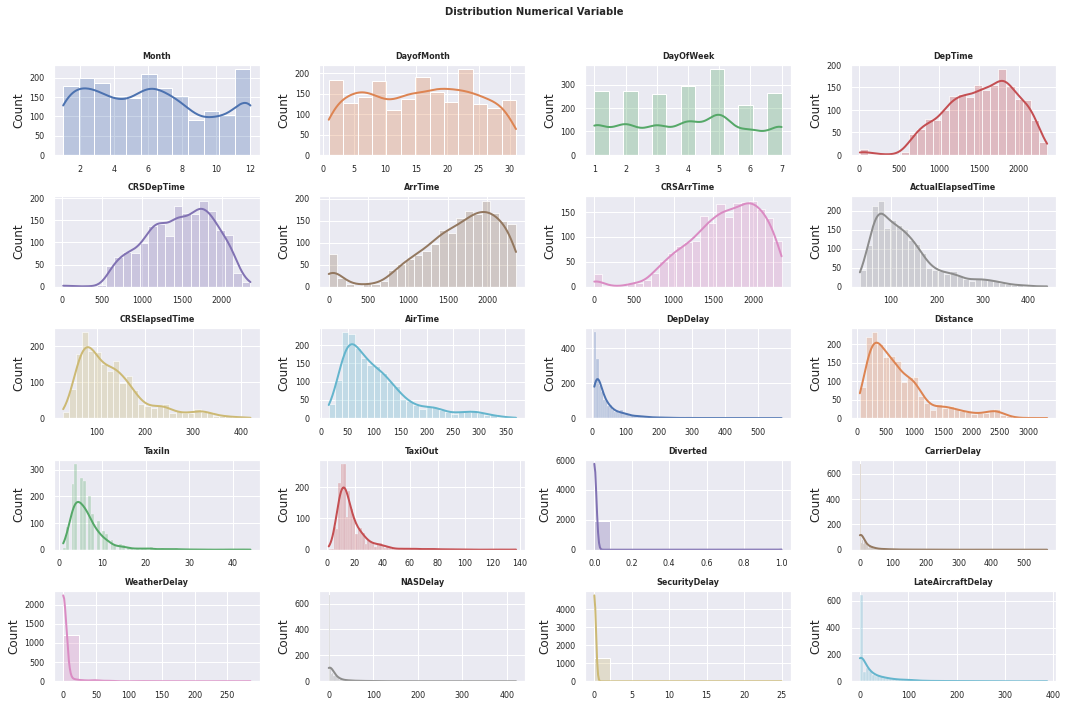

In [18]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 10, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png")

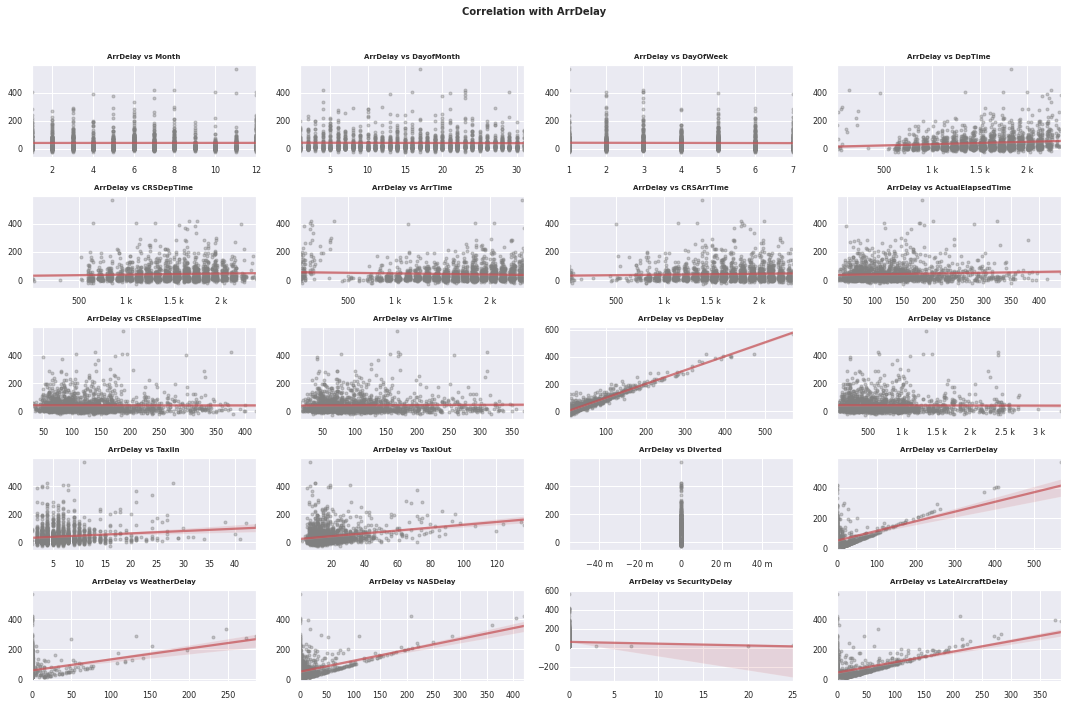

In [19]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Se eliminan los axes vacíos
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 10, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png")

## Numerical variables correlation

In [20]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
195,AirTime,CRSElapsedTime,0.99,0.99
175,CRSElapsedTime,AirTime,0.99,0.99
199,AirTime,Distance,0.98,0.98
257,Distance,AirTime,0.98,0.98
178,CRSElapsedTime,Distance,0.98,0.98
256,Distance,CRSElapsedTime,0.98,0.98
155,ActualElapsedTime,AirTime,0.98,0.98
194,AirTime,ActualElapsedTime,0.98,0.98
173,CRSElapsedTime,ActualElapsedTime,0.97,0.97
154,ActualElapsedTime,CRSElapsedTime,0.97,0.97


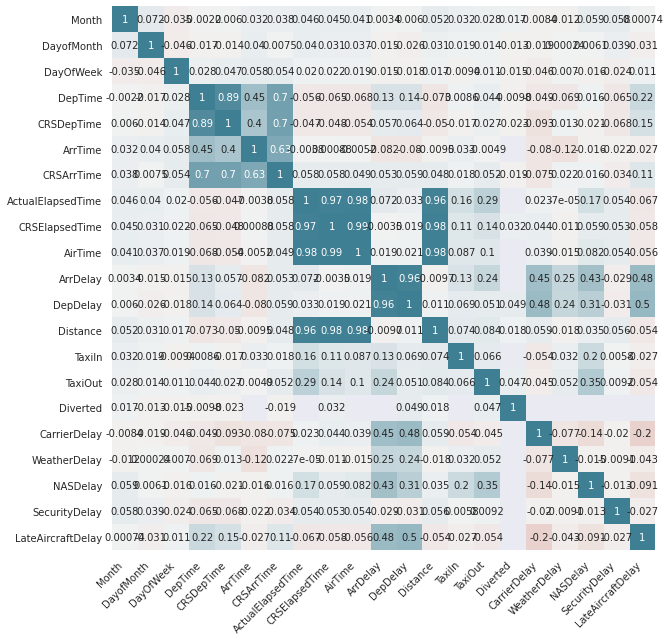

In [21]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)
plt.savefig("../reports/figures/heatmap_Matrix_Correlations.png")

## Qualitative variables

In [22]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

,UniqueCarrier,Origin,Dest
count,1937,1937,1937
unique,20,180,186
top,WN,ATL,ATL
freq,388,130,102


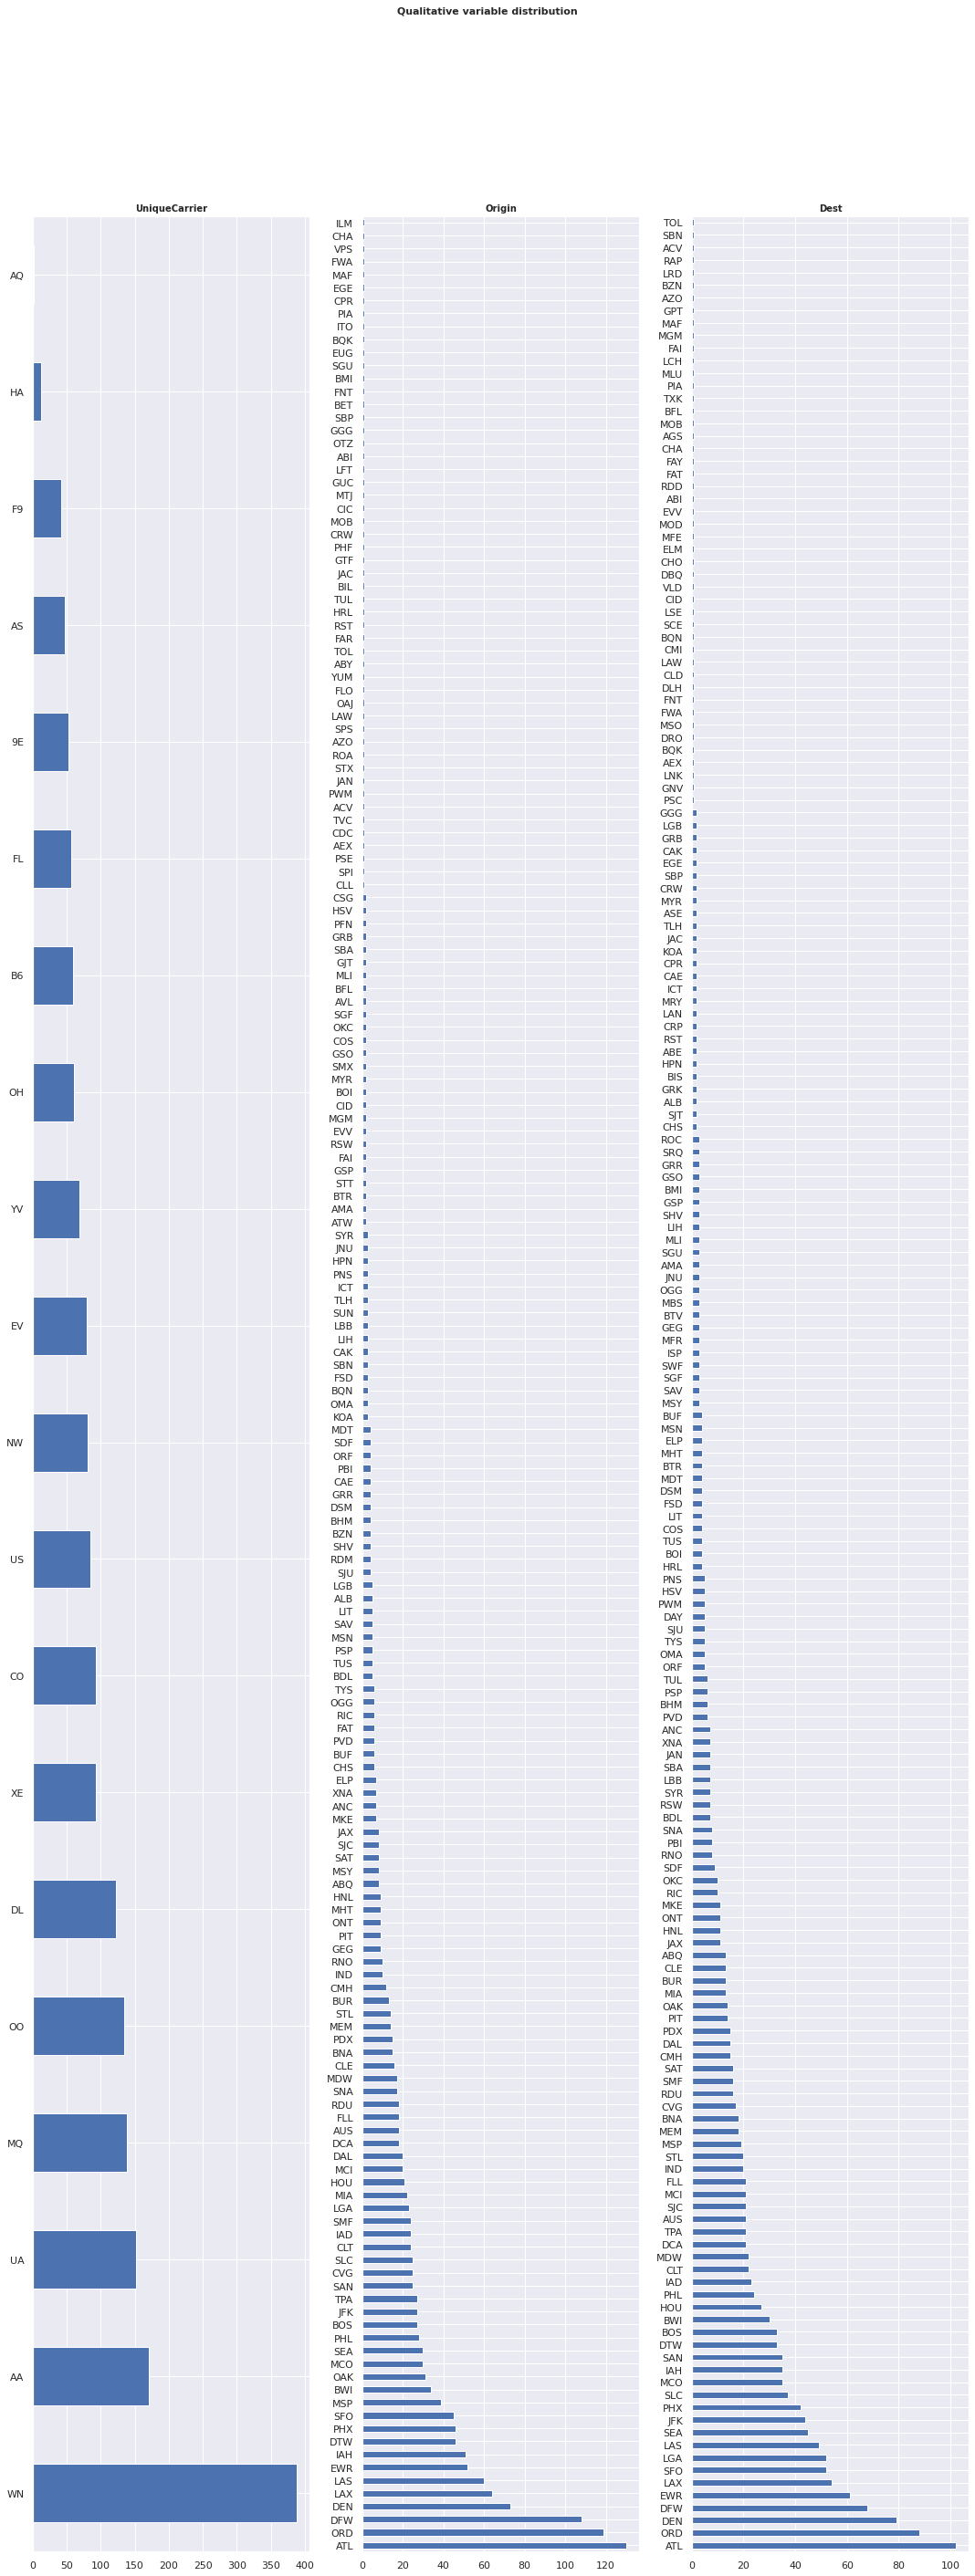

In [23]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 11, fontweight = "bold")
plt.savefig("../reports/figures/Each_Qualtitative_Variable.png")

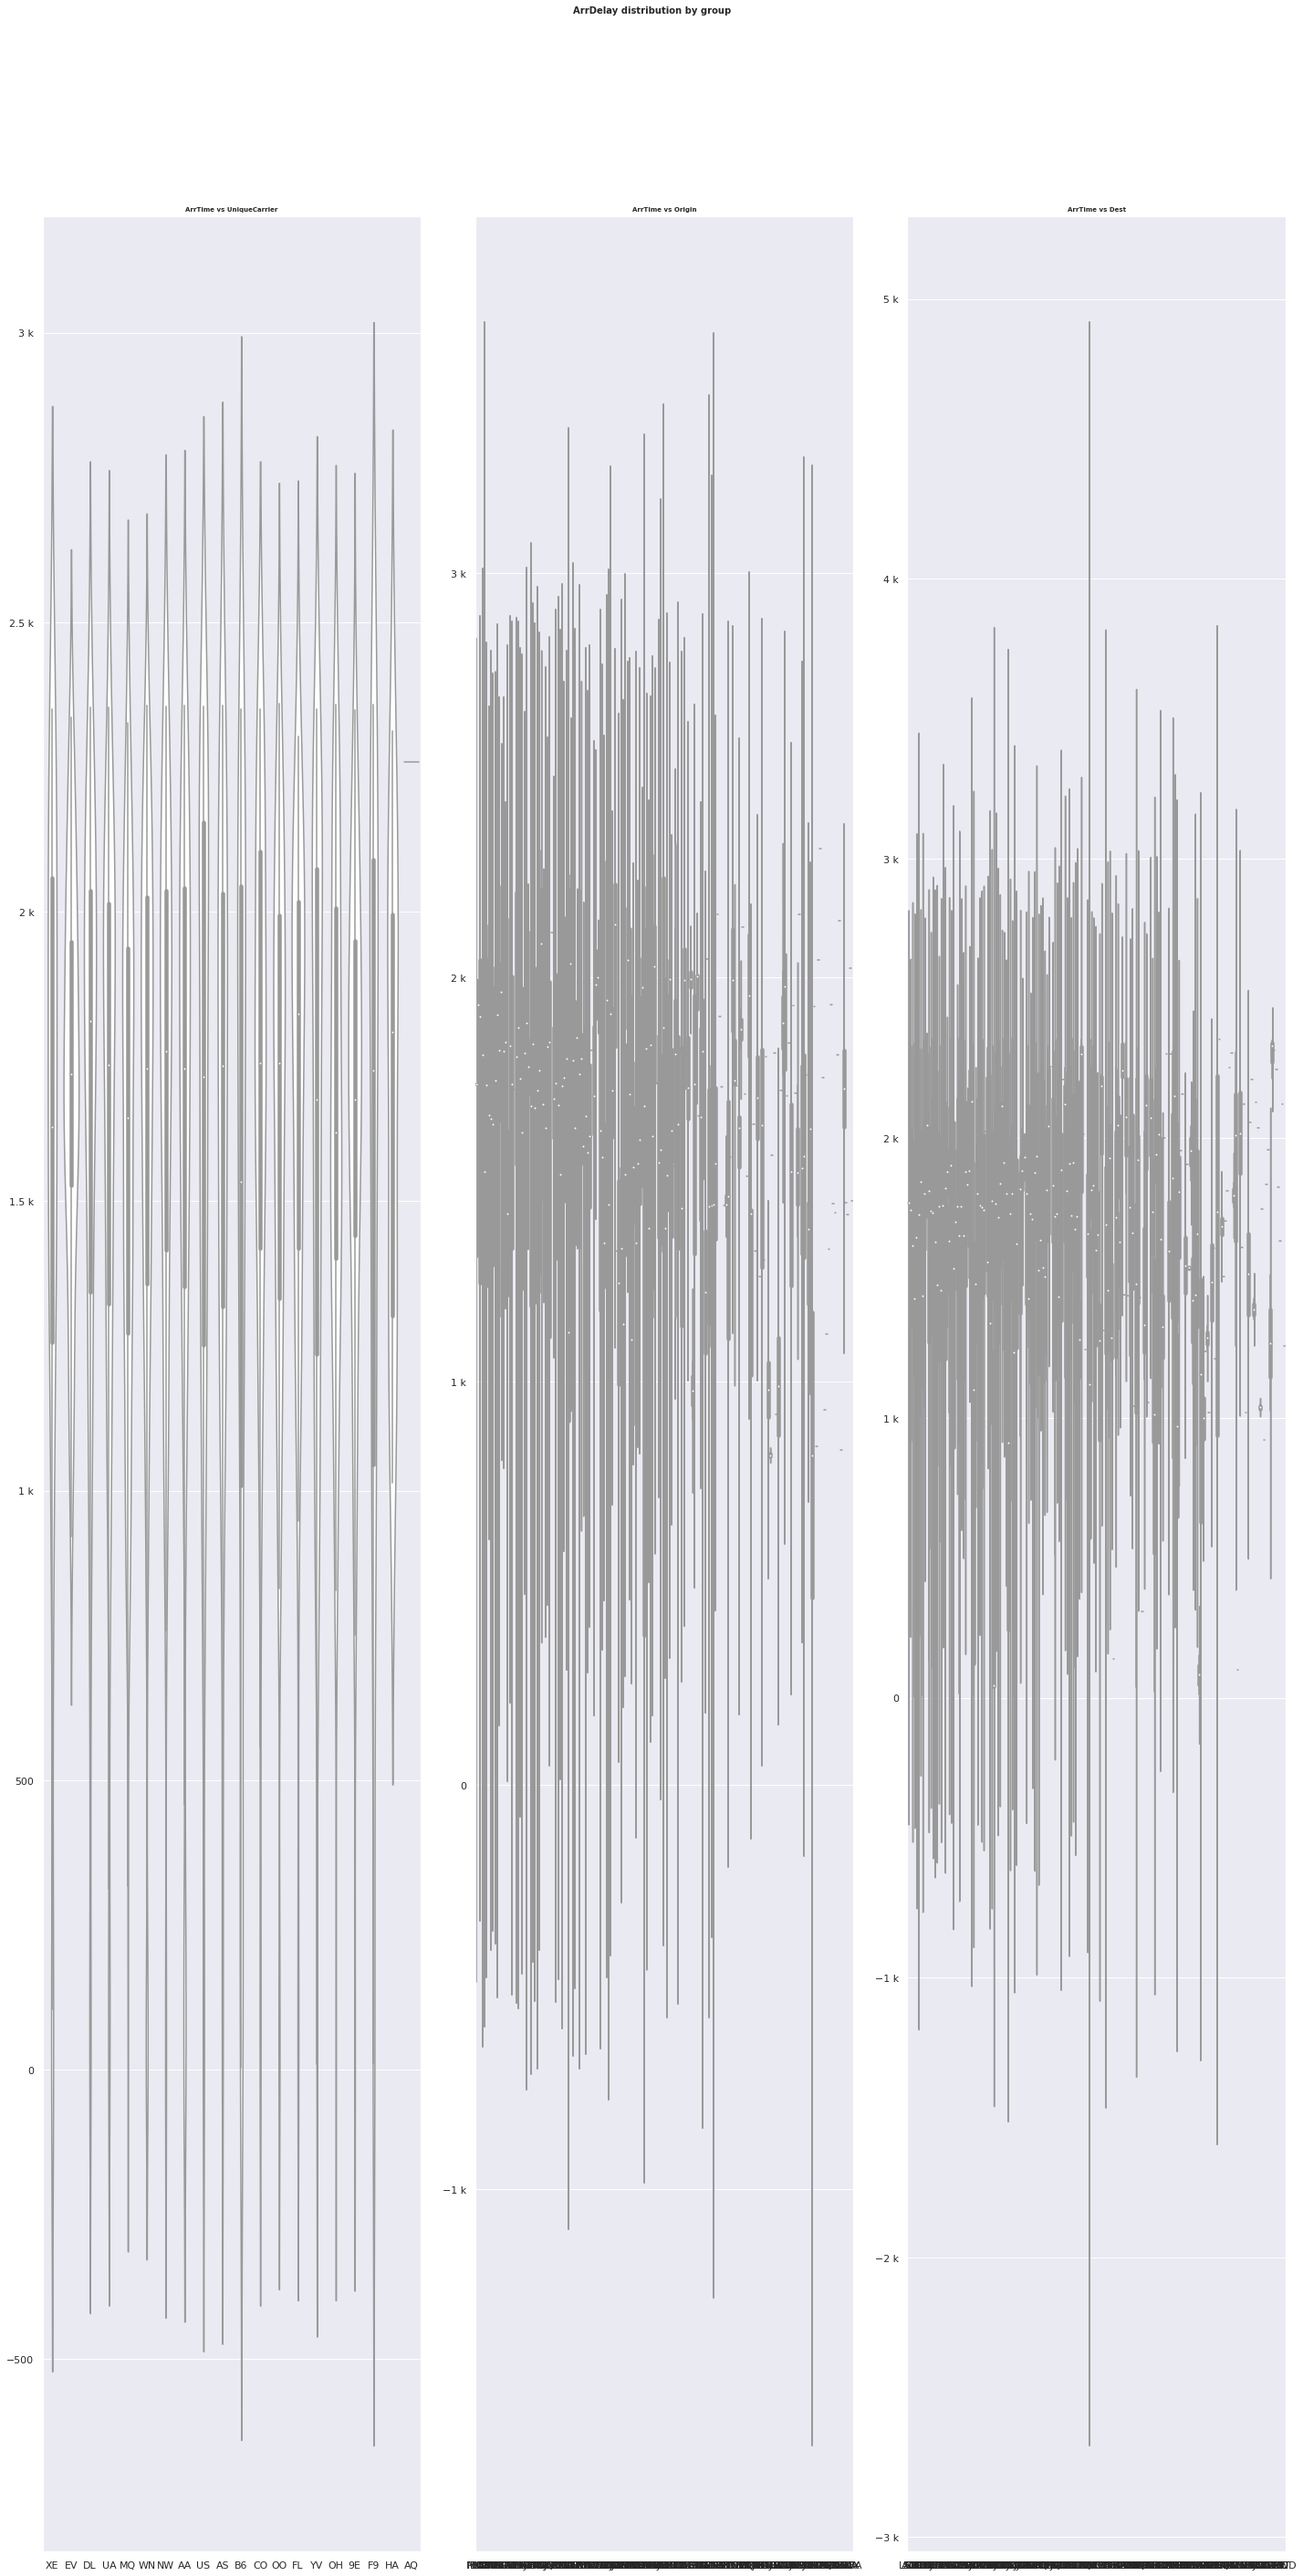

In [24]:
# Graph relationship between the price and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ArrTime',
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"ArrTime vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 10, fontweight = "bold")
plt.savefig("../reports/figures/ArrDelay_vs_Qualitative_Variable.png")

## Transform Categorical Variables

In [25]:
# Label encoding 

geo_encoding=OrdinalEncoder()

geo=['UniqueCarrier','Origin','Dest']

df[geo]=geo_encoding.fit_transform(df[geo])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1937 non-null   int64  
 1   DayofMonth         1937 non-null   int64  
 2   DayOfWeek          1937 non-null   int64  
 3   DepTime            1937 non-null   float64
 4   CRSDepTime         1937 non-null   int64  
 5   ArrTime            1931 non-null   float64
 6   CRSArrTime         1937 non-null   int64  
 7   UniqueCarrier      1937 non-null   float64
 8   ActualElapsedTime  1931 non-null   float64
 9   CRSElapsedTime     1937 non-null   float64
 10  AirTime            1931 non-null   float64
 11  ArrDelay           1931 non-null   float64
 12  DepDelay           1937 non-null   float64
 13  Origin             1937 non-null   float64
 14  Dest               1937 non-null   float64
 15  Distance           1937 non-null   int64  
 16  TaxiIn            

## Missing values

In [27]:
df.isnull().sum().sum()

3371

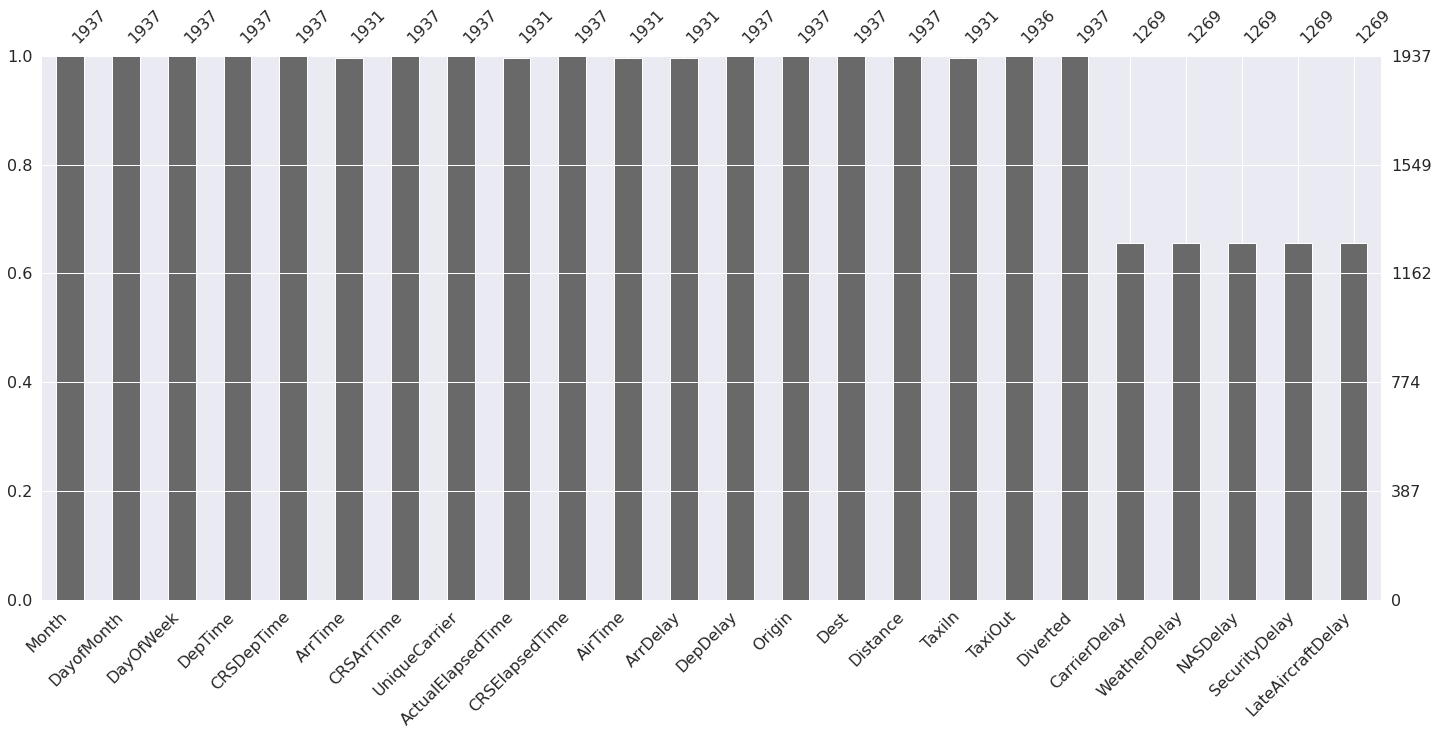

In [28]:
# Missing Values
msno.bar(df);

In [29]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [30]:
df.isna().any()

Month                False
DayofMonth           False
DayOfWeek            False
DepTime              False
CRSDepTime           False
ArrTime              False
CRSArrTime           False
UniqueCarrier        False
ActualElapsedTime    False
CRSElapsedTime       False
AirTime              False
ArrDelay             False
DepDelay             False
Origin               False
Dest                 False
Distance             False
TaxiIn               False
TaxiOut              False
Diverted             False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

In [31]:
df.to_csv(path + "processed/DelayedFlightsProcessed.csv", index = False, header = True)

*****************************************************************************
*****************************************************************************
*****************************************************************************

## Divide the data set into training set and test set

In [32]:
df = pd.read_csv(path + 'processed/DelayedFlightsProcessed.csv')

In [33]:
# Matrix
X = df.drop('ArrDelay', axis = 'columns')
# Vector
y = df['ArrDelay']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

## Checking if the training set was correcly splitted

In [35]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (1015, 23) Target:  (1015,)
Test set - Features:  (254, 23) Target:  (254,)


## Checking  Train, Test partition

In [36]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count   1015.00
mean      62.04
std       60.54
min       15.00
25%       24.00
50%       41.00
75%       78.00
max      569.00
Name: ArrDelay, dtype: float64


In [37]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count   254.00
mean     64.70
std      61.03
min      15.00
25%      26.00
50%      45.00
75%      76.00
max     408.00
Name: ArrDelay, dtype: float64


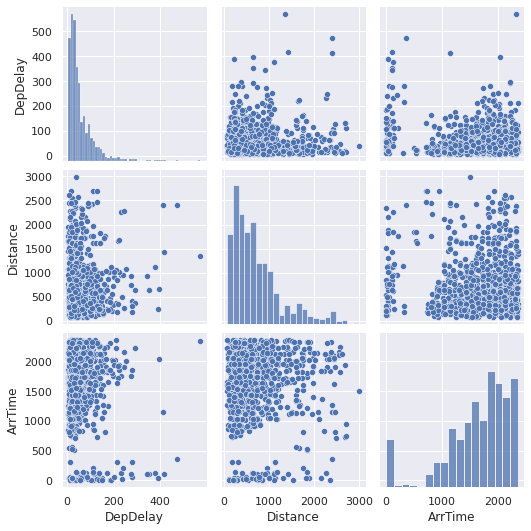

In [38]:
sns.pairplot(X_train[['DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/train_pairplot.png")

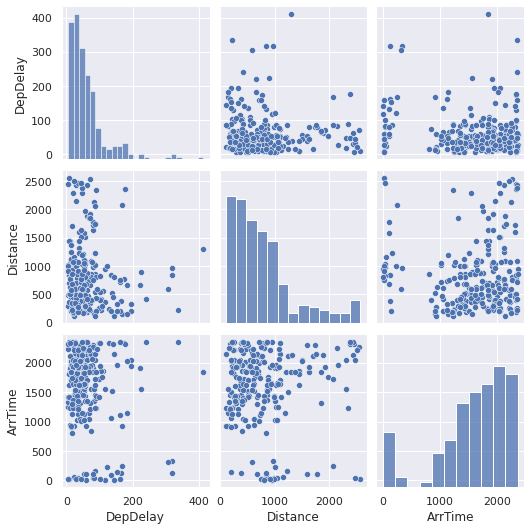

In [39]:
sns.pairplot(X_test[['DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/test_pairplot.png")

In [40]:
X_train.to_csv(path + "interim/X_train.csv", index = False, header = True)
X_test.to_csv(path + "interim/X_test.csv", index = False, header = True)

## Automate fit and evaluate all the models with LazyClassifier

In [41]:
# LazyRegressor Instance and fiting data

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:27<00:00,  1.05it/s]


In [42]:
models.head(10)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.10,0.07,None,0.09,0.08
LGBMClassifier,0.09,0.07,None,0.08,10.08
RandomForestClassifier,0.06,0.06,None,0.06,0.90
ExtraTreesClassifier,0.06,0.05,None,0.04,0.49
BaggingClassifier,0.07,0.05,None,0.07,0.36
LabelPropagation,0.03,0.04,None,0.02,0.08
LabelSpreading,0.03,0.04,None,0.02,0.15
XGBClassifier,0.06,0.04,None,0.06,2.80
LinearDiscriminantAnalysis,0.05,0.04,None,0.04,0.03


## DecisionTreeClassifier

In [43]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1}
Best score is 0.05358687871525941


## RandomForestClassifier

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, x_test, y_test)

In [ ]:
def metrics(model, name, X_test, y_test):
    y_pred=model.predict(X_test)
    scores={'model':name,
            'accuracy':accuracy_score(y_test,y_pred),
            'Roc_AUC':roc_auc_score(y_test,y_pred),
            'precision':precision_score(y_test,y_pred),
            'recall':recall_score(y_test,y_pred),
            'f1':f1_score(y_test,y_pred)}
    return scores

DecisionTreeClassifier 2

In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()

In [ ]:
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [ ]:
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
    max_depth = [2,4,6,8,10,12]

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
    clf_GS.fit(X, y)

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
    print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

In [ ]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)